# Meta Prophet Model

[Prophet link](https://facebook.github.io/prophet/)

[Prophet Paper link](https://peerj.com/preprints/3190.pdf)


In [ ]:
! pip install prophet

In [34]:
import pandas as pd
from prophet import Prophet

In [35]:
df = pd.read_csv('data/Miles_Traveled.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [37]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


## Important - columns MUST be named as follows

In [38]:
df.columns = ['ds','y']

In [39]:
df['ds'] = pd.to_datetime(df['ds'])

In [40]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<Axes: xlabel='ds'>

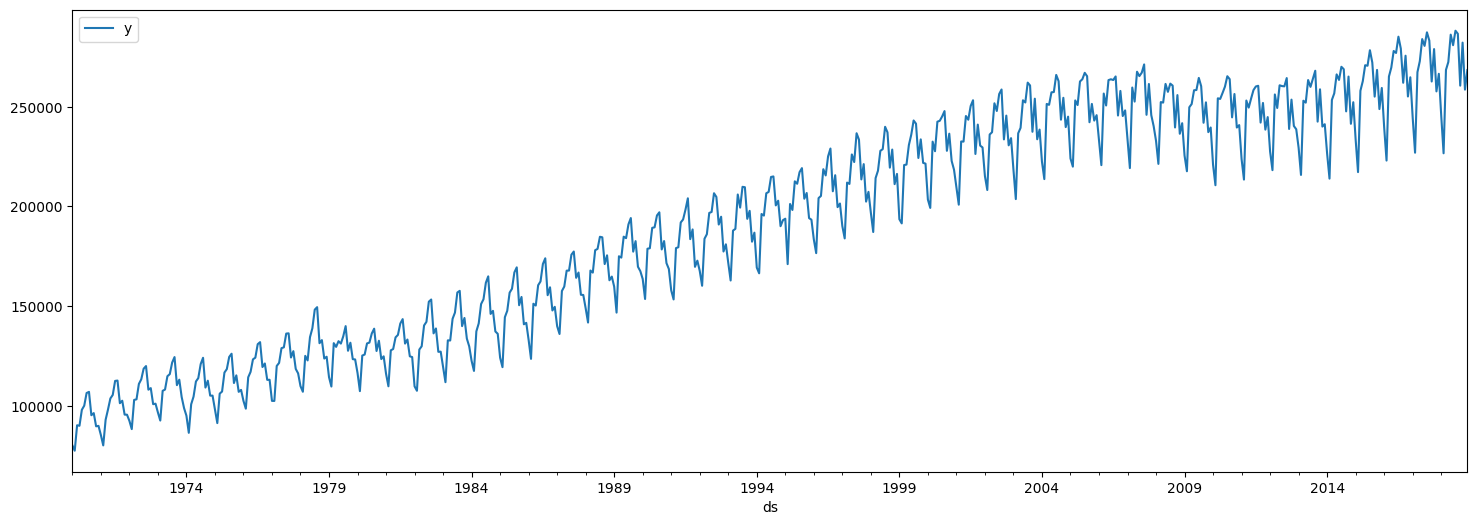

In [41]:
df.plot(x='ds',y='y',figsize=(18,6))

In [42]:
len(df)

588

In [43]:
len(df) - 12

576

In [44]:
train = df.iloc[:576]
test = df.iloc[576:]

## Main lines for Prophet

In [45]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

17:26:39 - cmdstanpy - INFO - Chain [1] start processing
17:26:39 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263395.018116,274188.120873,285651.783660,263348.379636,263486.605612,16427.507412,16427.507412,16427.507412,16427.507412,16427.507412,16427.507412,0.0,0.0,0.0,279822.525528
584,2018-09-01,263536.322381,255497.220996,267494.381483,263456.361840,263661.776654,-1690.893599,-1690.893599,-1690.893599,-1690.893599,-1690.893599,-1690.893599,0.0,0.0,0.0,261845.428781
585,2018-10-01,263673.068444,263269.823611,274628.600927,263558.662838,263831.500850,5277.378352,5277.378352,5277.378352,5277.378352,5277.378352,5277.378352,0.0,0.0,0.0,268950.446795
586,2018-11-01,263814.372709,249656.175896,261350.189441,263670.408914,264011.050351,-8237.228440,-8237.228440,-8237.228440,-8237.228440,-8237.228440,-8237.228440,0.0,0.0,0.0,255577.144268
587,2018-12-01,263951.118771,251242.831480,262647.730687,263772.237889,264206.460202,-6942.342688,-6942.342688,-6942.342688,-6942.342688,-6942.342688,-6942.342688,0.0,0.0,0.0,257008.776083


In [47]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


[Info on ax= parameter](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)

<Axes: xlabel='ds'>

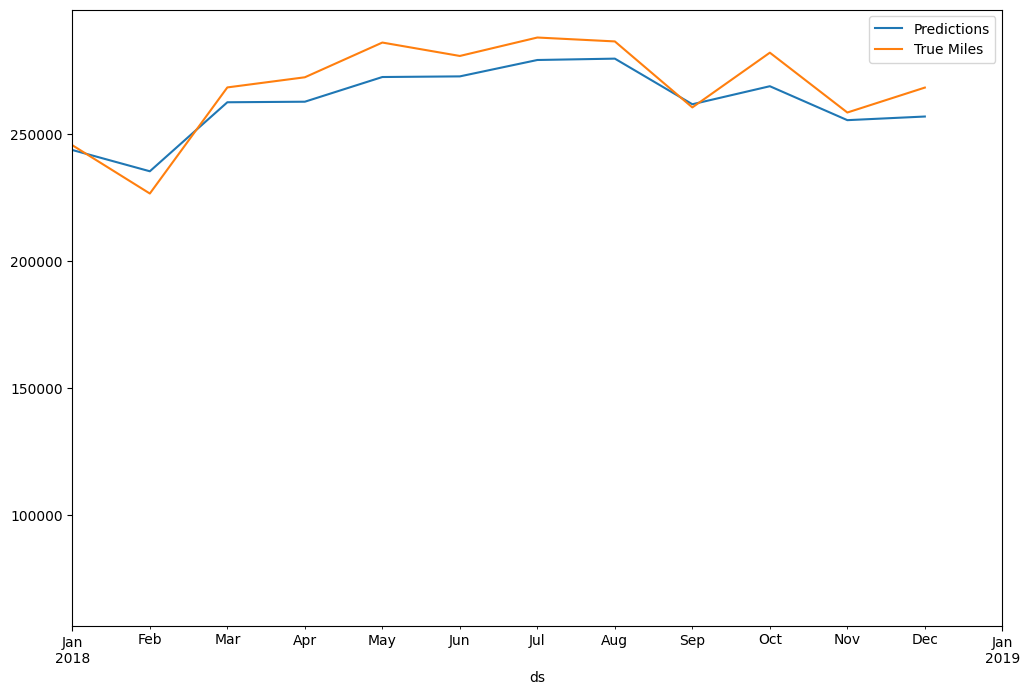

In [48]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [49]:
from statsmodels.tools.eval_measures import rmse

In [50]:
predictions = forecast.iloc[-12:]['yhat']

In [51]:
predictions

576    243811.934625
577    235429.331975
578    262630.368025
579    262844.366086
580    272577.940309
581    272829.337204
582    279287.096304
583    279822.525528
584    261845.428781
585    268950.446795
586    255577.144268
587    257008.776083
Name: yhat, dtype: float64

In [52]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [53]:
rmse(predictions,test['y'])

8644.964780756161

In [54]:
test.mean()

/tmp/ipykernel_4672/1706541227.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.mean()


y    268739.666667
dtype: float64

In [56]:
# Percent of mean...
print((rmse(predictions,test['y'])/test.mean()*100)[0],"%")

3.2168547680305823 %


/tmp/ipykernel_4672/1990949157.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print((rmse(predictions,test['y'])/test.mean()*100)[0],"%")


# Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values throughout the entire data series.

In [57]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [58]:
len(df)

588

In [59]:
len(df)/12

49.0

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.
See [Prophet Diagnostic Link](https://facebook.github.io/prophet/docs/diagnostics.html)

In [60]:
# help(pd.Timedelta)

In [61]:
# Initial 5 years training period
#MUST BE IN THIS FORMAT
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [62]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

17:27:36 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:37 - cmdstanpy - INFO - Chain [1] start processing
17:27:37 - cmdstanpy - INFO - Chain [1] done processing
17:27:38 - cmdstanpy - INFO - Chain [1] start processing
17:27:38 - cmdstanpy - INFO - Chain [1] done processing
17:27:38 - cmdstanpy - INFO - Chain [1] start processing
17:27:38 - cmdstanpy - INFO - Chain [1] done processing
17:27:38 - cmdstanpy - INFO - Chain [1] start processing
17:27:38 - cmdstanpy - INFO - Chain [1]

In [63]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.057830,107000.033976,109902.890738,102445.0,1976-12-11
1,1977-02-01,102996.081749,101634.191319,104431.433510,102416.0,1976-12-11
2,1977-03-01,118973.288965,117506.014477,120381.745835,119960.0,1976-12-11
3,1977-04-01,120612.897995,119069.194114,122040.187096,121513.0,1976-12-11
4,1977-05-01,127882.998497,126297.836404,129250.922123,128884.0,1976-12-11


In [64]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273312.403140,267700.788455,279398.067665,283184.0,2016-12-01
104,2017-09-01,255431.589298,249662.363052,260838.549664,262673.0,2016-12-01
105,2017-10-01,262536.022305,256822.777095,268267.800482,278937.0,2016-12-01
106,2017-11-01,249187.236116,243514.849622,254988.091043,257712.0,2016-12-01
107,2017-12-01,250433.674651,244957.438620,256226.225171,266535.0,2016-12-01


In [65]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.441324e+07,4940.975365,4536.769797,0.027759,0.023487,0.027342,0.4
1,53 days,2.188610e+07,4678.257776,4267.106978,0.024974,0.023487,0.024677,0.4
2,54 days,1.848183e+07,4299.049320,3742.820236,0.020087,0.022326,0.019929,0.5
3,55 days,2.347725e+07,4845.333289,4273.621558,0.023215,0.023487,0.022964,0.4
4,57 days,2.126214e+07,4611.089262,4007.280855,0.021476,0.022326,0.021267,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.862537e+07,4315.712291,3779.654921,0.019714,0.019536,0.019723,0.5
95,361 days,1.774786e+07,4212.820863,3504.532878,0.018340,0.018934,0.018359,0.5
96,362 days,3.212707e+07,5668.074808,4432.588796,0.022148,0.024784,0.022047,0.4
97,364 days,3.034421e+07,5508.557637,4266.522128,0.021527,0.021703,0.021440,0.5


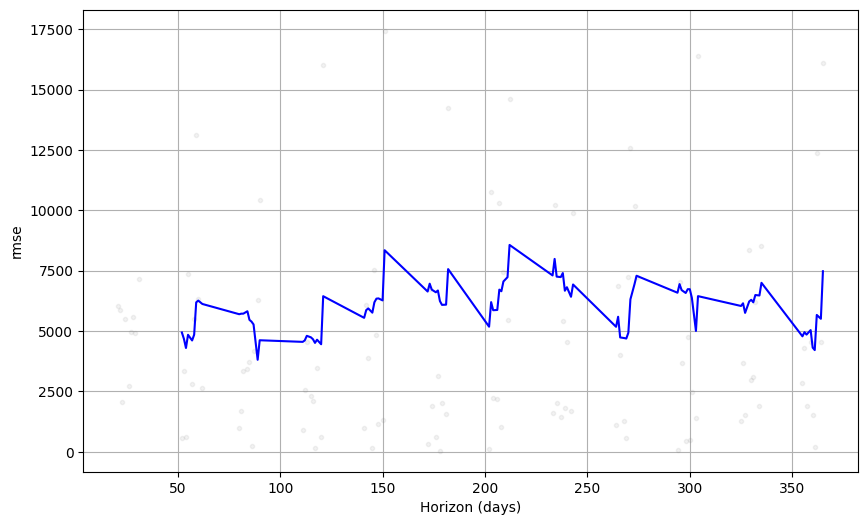

In [66]:
plot_cross_validation_metric(df_cv, metric='rmse');
# Ploting monthly - but grey dots are daily values so it confuses rather than helps

MAPE is Mean Absolute Percentage Error

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

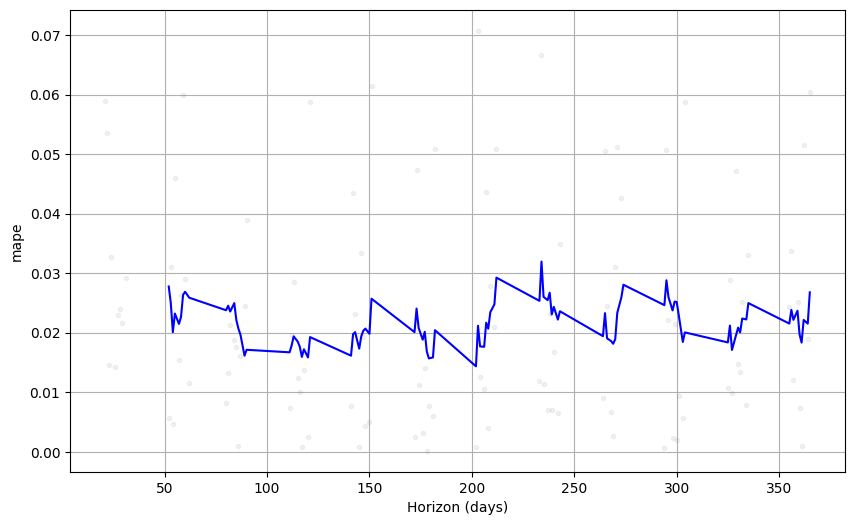

In [67]:
plot_cross_validation_metric(df_cv, metric='mape');